In [1]:
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cleaned_Spotify.csv")
df.head(5)

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,1,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,2,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,3,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,4,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928,0.0926,108.003,0.7200,1928
4,5,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
df = df.iloc[: , 1:] #Removing index column as it is of no use

In [4]:
df_features = ['acousticness','danceability','duration_ms','energy','explicit','instrumentalness','key','liveness','loudness','mode','release_date','speechiness','tempo','valence']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[df_features])
df[df_features] = scaler.transform(df[df_features])
df[df_features] = pd.DataFrame(df[df_features], columns= df_features)
df[df_features]
df_data = df[df_features] 
df_data.shape
df_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
count,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05,1.657110e+05
mean,-1.261282e-16,-4.478957e-16,-5.716448e-17,-2.945720e-16,3.284325e-15,-2.354981e-15,-1.007904e-15,-1.392142e-17,3.627683e-16,-2.237845e-15,-1.570656e-15,-4.102025e-17,7.796022e-16,-5.479977e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.307701e+00,-3.054644e+00,-1.874254e+00,-1.848972e+00,-2.835776e-01,-5.284486e-01,-1.482646e+00,-1.162363e+00,-8.657242e+00,-1.563922e+00,-2.244374e+00,-6.995441e-01,-3.810761e+00,-2.015495e+00
25%,-1.061271e+00,-6.924495e-01,-4.986069e-01,-8.377459e-01,-2.835776e-01,-5.284486e-01,-9.125517e-01,-6.085234e-01,-5.347030e-01,-1.563922e+00,-7.834238e-01,-4.105352e-01,-7.605565e-01,-8.022640e-01
50%,4.989425e-05,5.320717e-02,-1.913946e-01,-2.127456e-02,-2.835776e-01,-5.277027e-01,-5.740990e-02,-4.050719e-01,1.575255e-01,6.394181e-01,4.576422e-02,-3.285527e-01,-6.989564e-02,4.320602e-02
75%,1.047842e+00,7.305594e-01,2.562669e-01,8.251590e-01,-2.835776e-01,-2.217296e-01,7.977319e-01,3.070081e-01,7.460175e-01,6.394181e-01,8.354671e-01,-9.171435e-02,6.117474e-01,8.355973e-01
max,1.334327e+00,2.569087e+00,4.251687e+01,1.896309e+00,3.526372e+00,2.686636e+00,1.652874e+00,4.489066e+00,2.685394e+00,6.394181e-01,1.664655e+00,7.316522e+00,4.135697e+00,1.775851e+00


In [5]:
df['popularity_bi'] = [1 if x >= 40 else 0 for x in df['popularity']]

In [6]:
df_target = df[["popularity","popularity_bi"]]
print(df_target.shape)
df_target.describe()

(165711, 2)


,popularity,popularity_bi
count,165711.000000,165711.000000
mean,32.058687,0.406714
std,21.404763,0.491222
min,0.000000,0.000000
25%,14.000000,0.000000
50%,34.000000,0.000000
75%,48.000000,1.000000
max,100.000000,1.000000


In [7]:
# Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data,df_target["popularity_bi"] , random_state = 42, test_size= 0.25)

In [9]:
# Train a k-NN model with k = 3
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(x_train, y_train)
knn3.score(x_test, y_test)

0.8102491068842329

In [9]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=1) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.9976746618604314
With KNN (K=3) test accuracy is:  0.7855798011007048


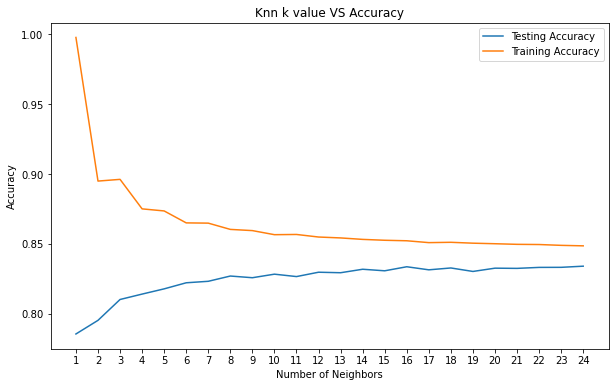

Best accuracy is 0.834073573428599 with K = 24


In [10]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()
# define a list of parameters
param_knn = {'n_neighbors': range(3, 26, 2)}  # exactly the same as the input variable name. 

# range(i, j, s): from i to j not including j, increase by s
#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(x_train, y_train)

# the best hyperparameter chosen:
print("Best k is:", grid_knn.best_params_)
# When k=25 (best case), the validation score of through CV is:
print("Mean validation score is:", grid_knn.best_score_)
# test accuracy under best model
print("Test accuracy:", grid_knn.score(x_test, y_test))

Best k is: {'n_neighbors': 25}
Mean validation score is: 0.8365424068607744
Test accuracy: 0.833663222941006


In [14]:
from sklearn.metrics import confusion_matrix
y_test_pred = grid_knn.predict(x_test)
knn_matrix = confusion_matrix(y_test, y_test_pred)
knn_matrix

array([[21678,  2912],
       [ 3979, 12859]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.8153573013759432
Recall score: 0.7636892742606011
Accuracy score: 0.833663222941006
F1 score: 0.7886779723389249
